In [1]:
from core.data import LiteratureDataset
from core.nlp import NlpPipeline
from core.viz import DataViz

dataset = LiteratureDataset()
nlp_pipeline = NlpPipeline()
data_viz = DataViz()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\houssem.menhour\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\houssem.menhour\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\houssem.menhour\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[11/02/23 23:54:47] INFO     INFO:gensim.utils:Doc2Vec lifecycle event {'params':                      ]8;id=731730;file://d:\ws\MedicalResearchTextAnalyser\.venv\Lib\site-packages\gensim\utils.py\utils.py]8;;\:]8;id=623779;file://d:\ws\MedicalResearchTextAnalyser\.venv\Lib\site-packages\gensim\utils.py#448\448]8;;\
                             'Doc2Vec<dm/m,d30,n5,w5,mc2,s0.001,t3>', 'datetime':                                  
                             '2023-11-02T23:54:47.089445', 'gensim': '4.3.2', 'python': '3.11.6                    
                             (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit                      
                             (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'created'}               

d:\ws\MedicalResearchTextAnalyser\.venv\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


## Dataset Preparation

In [2]:
# Dataset creation
dataset.load_data()
dataset.preview_data()

4
D1: Articles - Full
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 33 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          500 non-null    object 
 1   Abstract       500 non-null    object 
 2   Authors        500 non-null    object 
 3   Year           500 non-null    int64  
 4   Cited by       500 non-null    float64
 5   Document Type  500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.3+ KB
                                                 Title  \
33   Large language models for structured reporting...   
36   A survey of ASER members on artificial intelli...   
121  Automatic Classification of Tumor Response Fro...   
38   Revolutionizing radiology with GPT-based model...   
53   Artificial Intelligence-Powered Clinical Decis...   

                                              Abstract  \
33   Structured reporting may improve the radiologi...  

In [3]:
# list of abstracts as D1-4
dataset_abs = [dataset.get_abstracts(i) for i in range(len(dataset))]

for desc, db in zip(dataset.data_description, dataset_abs, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: Structured reporting may improve the radiological workflow and communication among physicians. Artificial intelligence applications in medicine are growing fast. Large language models (LLMs) are recently gaining importance as valuable tools in radiology and are currently being tested for the critical task of structured reporting. We compared four LLMs models in terms of knowledge on structured reporting and templates proposal. LLMs hold a great potential for generating structured reports in radiology but additional formal validations are needed on this topic. © 2023, Italian Society of Medical Radiology.
D2: Reviews - Full (42 works)
	Sample: Various natural language processing (NLP) algorithms have been applied in the literature to analyze radiology reports pertaining to the diagnosis and subsequent care of cancer patients. Applications of this technology include cohort selection for clinical trials, population of large-scale data registries, a

## NLP Pipeline

In [4]:
# Preprocessing
dataset_tkns = [nlp_pipeline.preprocess(db) for db in dataset_abs]

for desc, db in zip(dataset.data_description, dataset_tkns, strict=True):
    print(f"{desc} ({len(db)} works)")
    print(f"\tSample: {db[0]}")

D1: Articles - Full (500 works)
	Sample: ['structur', 'report', 'may', 'improv', 'radiolog', 'workflow', 'communic', 'among', 'physician', 'artifici', 'intellig', 'applic', 'medicin', 'grow', 'fast', 'larg', 'languag', 'model', 'llms', 'recent', 'gain', 'import', 'valuabl', 'tool', 'radiolog', 'current', 'test', 'critic', 'task', 'structur', 'report', 'compar', 'four', 'llms', 'model', 'term', 'knowledg', 'structur', 'report', 'templat', 'propos', 'llms', 'hold', 'great', 'potenti', 'generat', 'structur', 'report', 'radiolog', 'addit', 'formal', 'valid', 'need', 'topic', 'italian', 'societi', 'medic', 'radiolog']
D2: Reviews - Full (42 works)
	Sample: ['various', 'natur', 'languag', 'process', 'nlp', 'algorithm', 'appli', 'literatur', 'analyz', 'radiolog', 'report', 'pertain', 'diagnosi', 'subsequ', 'care', 'cancer', 'patient', 'applic', 'technolog', 'includ', 'cohort', 'select', 'clinic', 'trial', 'popul', 'data', 'registri', 'qualiti', 'improv', 'radiolog', 'workflow', 'includ', 'mam

In [5]:
# Stats
dataset_stats = nlp_pipeline.stats(dataset_tkns)
w_count, tf_idf = dataset_stats

for i in range(len(w_count)):
    desc = dataset.data_description[i]
    w_count_i = w_count.iloc[i]
    tf_idf_i = tf_idf.iloc[i]

    print(f"{desc} (Word Count)")
    print(w_count_i.sort_values(ascending=False).head(10))

    print(f"{desc} (TF-IDF)")
    print(tf_idf_i.sort_values(ascending=False).head(10))

D1: Articles - Full (Word Count)
report         2293
radiolog       1427
use             968
imag            754
system          658
radiologist     583
model           560
patient         501
result          495
clinic          477
Name: 0, dtype: int64
D1: Articles - Full (TF-IDF)
report         0.558359
radiolog       0.347483
use            0.235714
imag           0.183603
system         0.160227
radiologist    0.141964
model          0.136363
patient        0.121996
result         0.120535
clinic         0.116152
Name: 0, dtype: float64
D2: Reviews - Full (Word Count)
radiolog       137
report         130
radiologist     63
imag            60
data            59
use             53
applic          47
ai              46
clinic          44
studi           44
Name: 1, dtype: int64
D2: Reviews - Full (TF-IDF)
radiolog       0.433212
report         0.411078
radiologist    0.199215
imag           0.189728
data           0.186566
use            0.167593
applic         0.148620
ai          

In [6]:
dataset_empath = [nlp_pipeline.empath(db) for db in dataset_tkns]
dataset_empath_sorted = [{k: v for k, v in sorted(db.items(), key=lambda item: item[1], reverse=True)} for db in dataset_empath]

for desc, db in zip(dataset.data_description, dataset_empath_sorted, strict=True):
    print(f"{desc} (Empath)")
    print(db)

D1: Articles - Full (Empath)
{'communication': 0.06001901054632689, 'work': 0.04542917062719715, 'meeting': 0.0442674150183316, 'journalism': 0.03949969070142881, 'crime': 0.035124247499207895, 'speaking': 0.027414414822191042, 'programming': 0.025302131896980943, 'technology': 0.023898972525234236, 'health': 0.02337090179393171, 'medical_emergency': 0.020458968904177793, 'computer': 0.018557914271488708, 'school': 0.01729054451636265, 'internet': 0.016988789812761206, 'help': 0.01288492584378159, 'music': 0.012432293788379426, 'healing': 0.011511941942395028, 'messaging': 0.010938608005552287, 'reading': 0.010304923127989257, 'fashion': 0.009625975044886012, 'phone': 0.009143167519123705, 'writing': 0.008886676021062478, 'traveling': 0.007936148704717936, 'musical': 0.007438253443775555, 'military': 0.007227025151254545, 'dance': 0.007166674210534256, 'college': 0.007015796858733535, 'office': 0.006487726127431011, 'art': 0.0061557959534694244, 'science': 0.005959655396128487, 'busine

## Visualization

C:\Users\houssem.menhour\AppData\Local\Temp\ipykernel_10836\2672253836.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


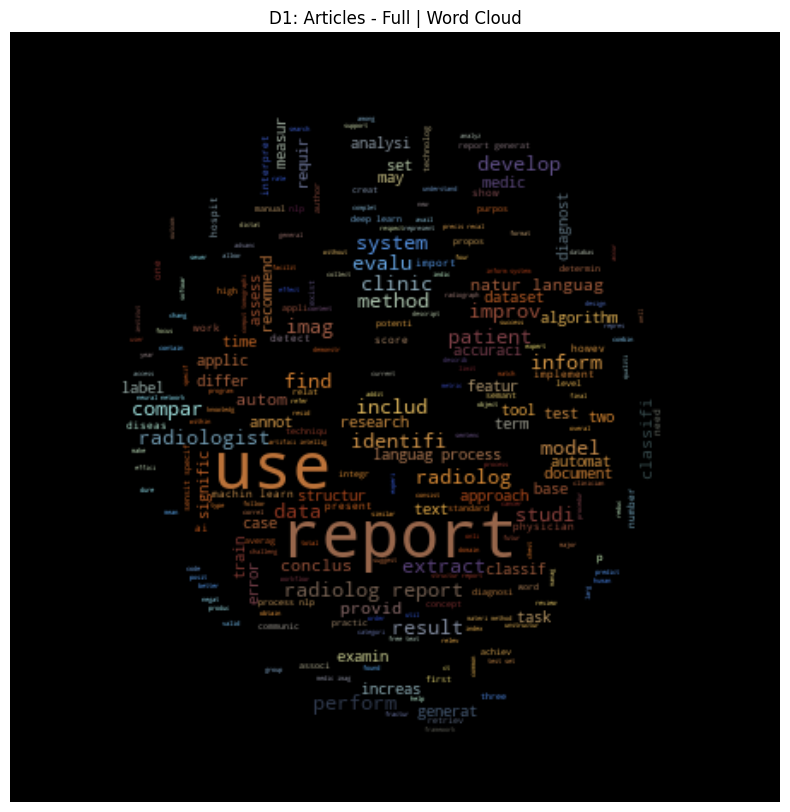

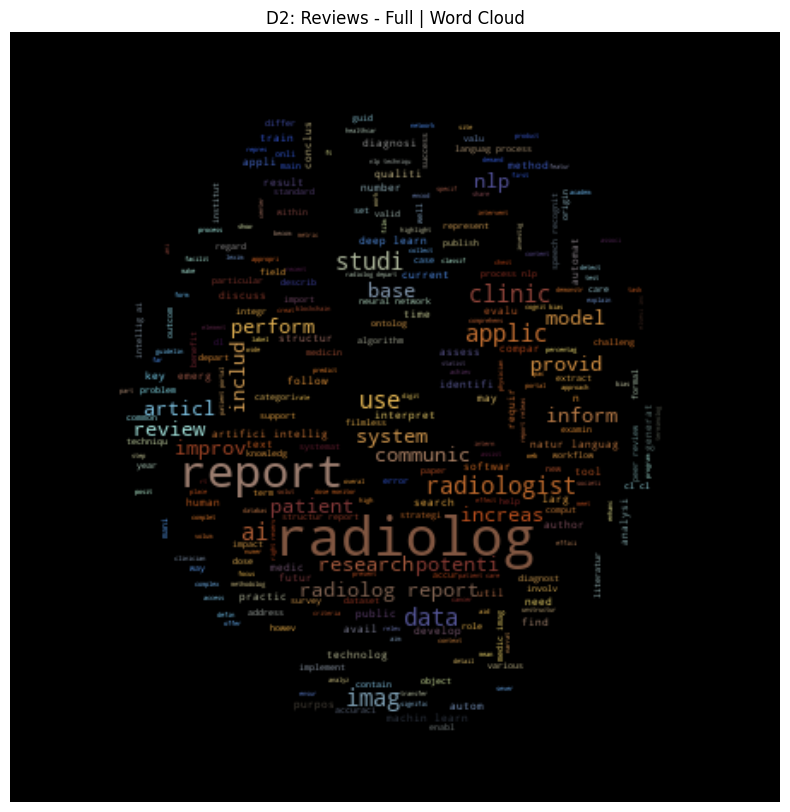

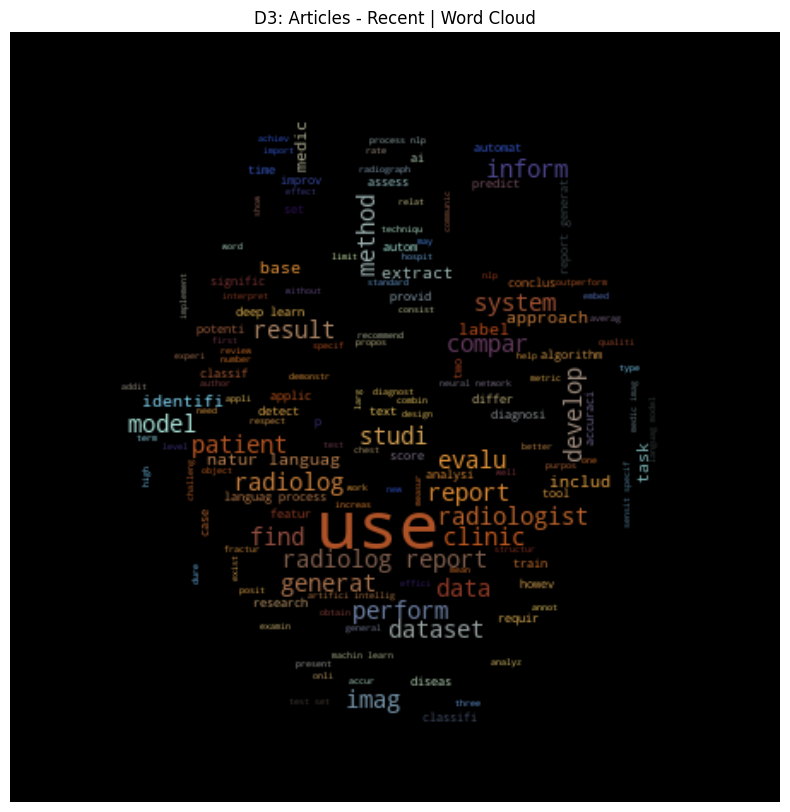

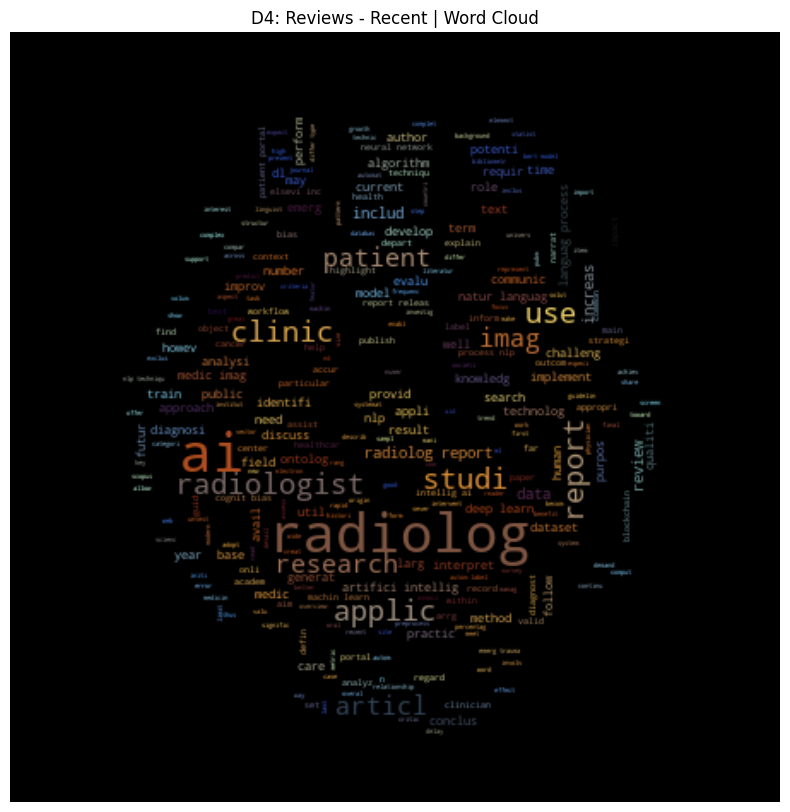

In [7]:
# Word Clouds
for desc, db in zip(dataset.data_description, dataset_tkns, strict=True):
    db_text = " ".join([w for doc in db for w in doc])
    fig = data_viz.word_cloud(db_text, desc)
    fig.show()

C:\Users\houssem.menhour\AppData\Local\Temp\ipykernel_10836\985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\houssem.menhour\AppData\Local\Temp\ipykernel_10836\985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\houssem.menhour\AppData\Local\Temp\ipykernel_10836\985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\houssem.menhour\AppData\Local\Temp\ipykernel_10836\985280320.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


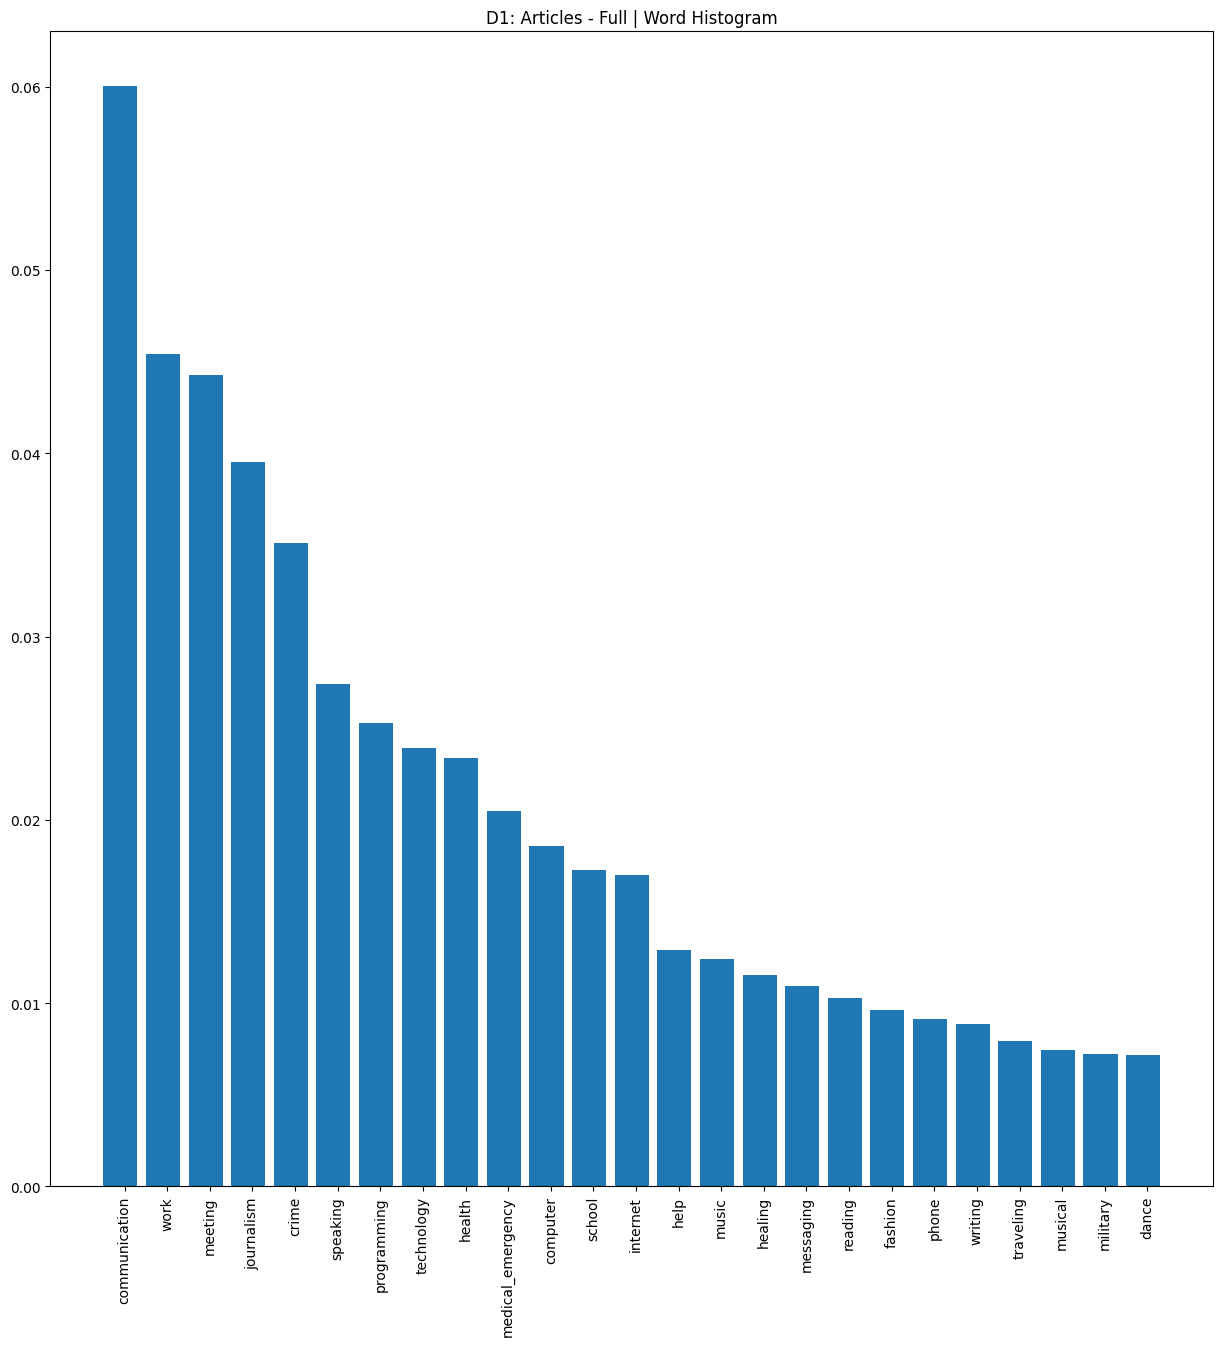

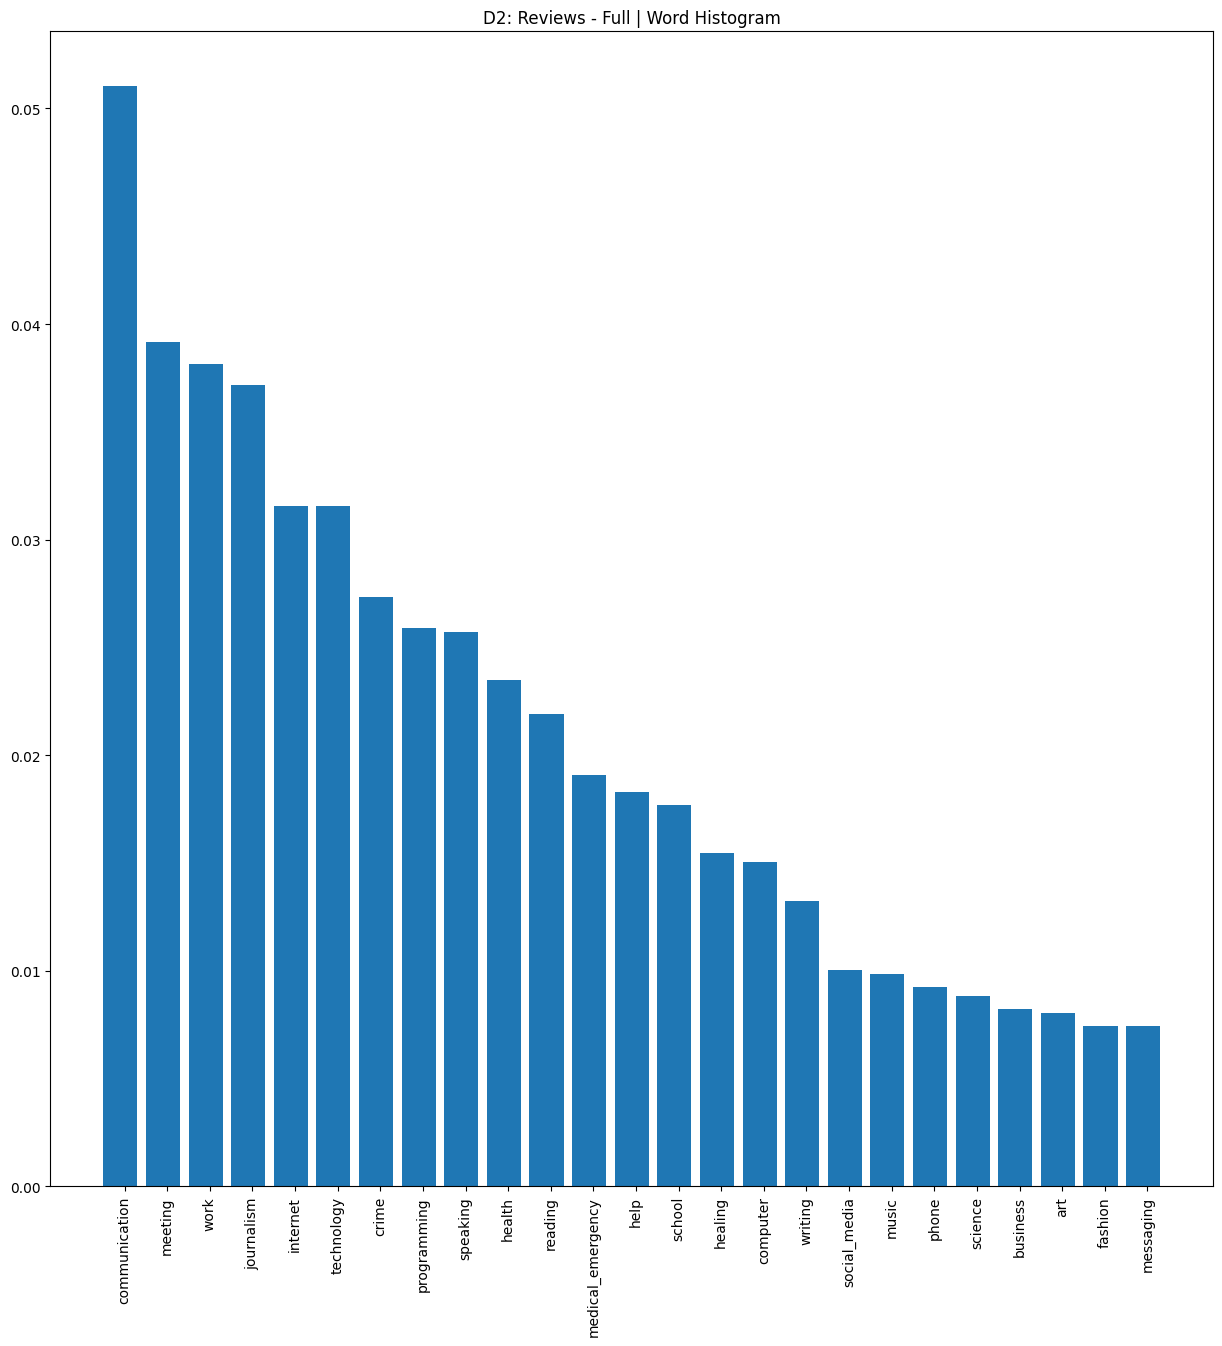

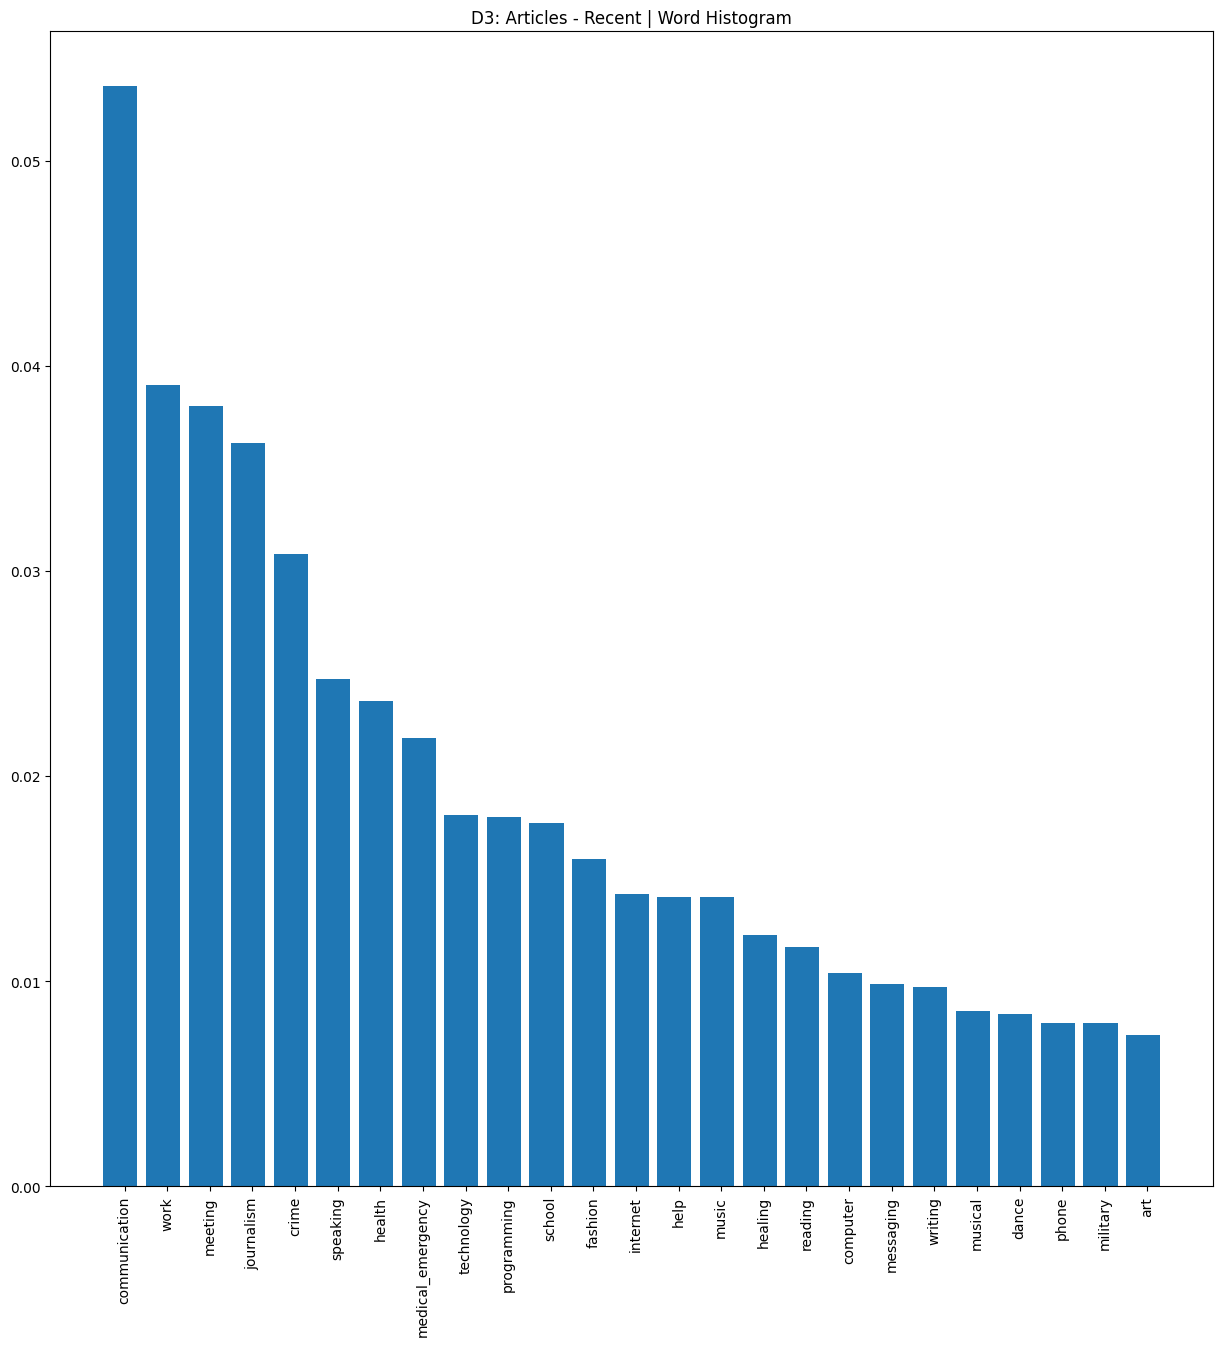

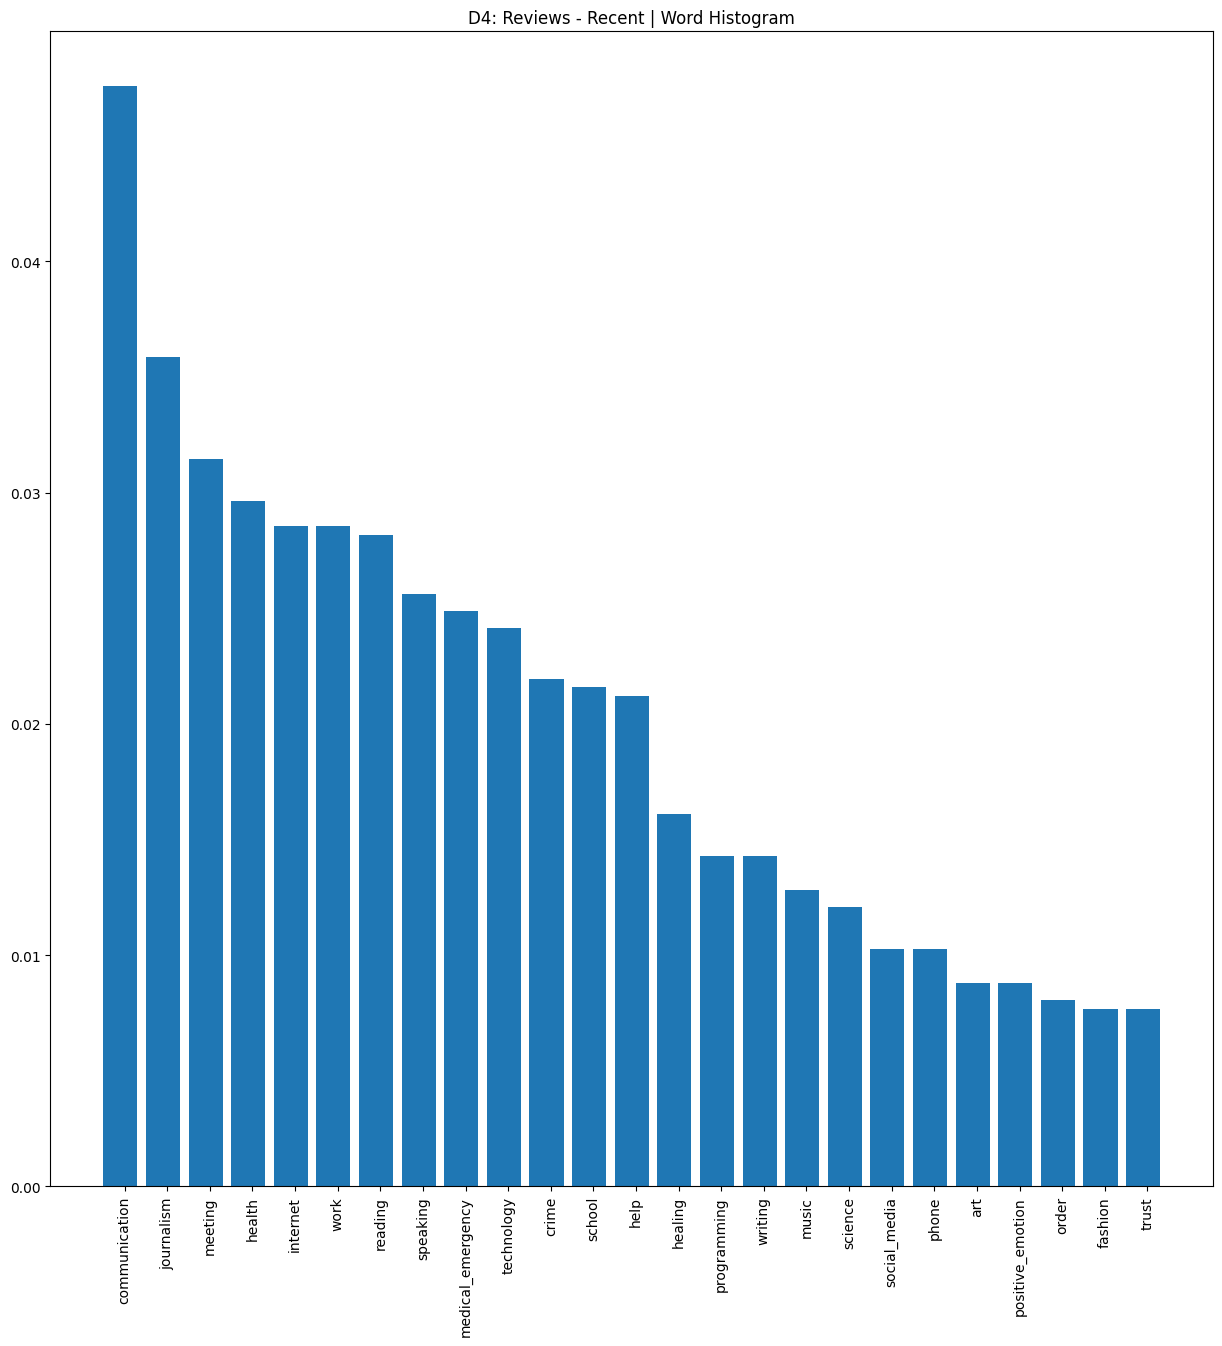

In [8]:
# Word histogram
for desc, db in zip(dataset.data_description, dataset_empath_sorted, strict=True):
    fig = data_viz.word_hist(db, desc)
    fig.show()